Importing Libraries


In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt


Generate Data
We will use the make_moons function to generate a dataset for demonstration.


In [2]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)



Linear kernel svm


In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model with a linear kernel
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_svm.predict(X_test)

# Evaluate the model
linear_accuracy = accuracy_score(y_test, linear_predictions)
print(f"Linear SVM Accuracy: {linear_accuracy:.2f}")


Linear SVM Accuracy: 1.00


RBF Kernel SVM with Grid Search

In [4]:
# Define hyperparameters for grid search
param_grid = {'gamma': [0.1, 1, 10, 100]}

# Perform grid search with k-fold cross-validation
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_gamma = grid_search.best_params_['gamma']

# Make predictions with the best model
rbf_predictions = best_model.predict(X_test)

# Evaluate the best model
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print(f"RBF SVM with Best Gamma={best_gamma} Accuracy: {rbf_accuracy:.2f}")


RBF SVM with Best Gamma=10 Accuracy: 1.00


Visualization
To visualize the decision boundaries


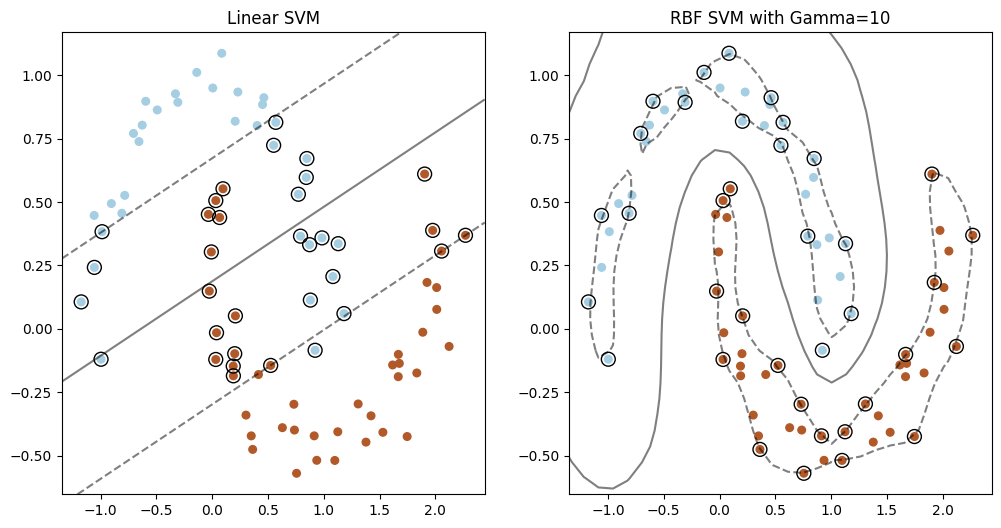

In [5]:
def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
axes[0] = plot_decision_function(linear_svm, axes[0])
axes[0].set_title('Linear SVM')

axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
axes[1] = plot_decision_function(best_model, axes[1])
axes[1].set_title(f'RBF SVM with Gamma={best_gamma}')

plt.show()
